In [25]:
## Load libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

%matplotlib inline


## Algorithm Here 

### Input:
 - D : a dataset containing n-objects
 - eps : the radius parameter, and 
 - MinPts : the neighborhood density threshold
 
### Output: A set of density based clusters.

### Method

mark all objects as unvisited;
- do
    - randomly select an unvisited object p;
    - mark p as visited;
    - if the eps-neighborhood of p has at least MinPts objects
        - create a new cluster C, and add p to C;
        - let N be the set of objects in the eps-neighborhood of p;
        - for each point p' in N
            - if p' is unvisited
                - mark p' as visited;
                - if the eps-neighborhood of p' has at least MinPts points
                - add those points to N;
            - if p' is not yet a member of any cluster, add p' to C;
        - end for
        - output C;
    - else mark p as noise;
- until no object is unvisited;

---------------------------------------------------------------------------------------------------
I am following Data Mining Concepts and Techniques by Jiawei Han, Micheline Kamber and Jian Pei
   



In [26]:
data=pd.read_csv('iris.data')



In [27]:
data.head()


,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [28]:
data.columns

Index(['5.1', '3.5', '1.4', '0.2', 'Iris-setosa'], dtype='object')

## Drop label column

In [29]:
data.drop(['Iris-setosa'],axis=1,inplace=True)

## Find Neighbours using euclidean distance

In [30]:
## find neighbors of a point P within eps
## data,index,eps
def findNeighbours(D,P,eps):
    """
        This function finds all points in 'D' within 'eps' of 'point'

        Returns the list of neighbors of a 'point' 
    """
    neighbours=[] ##empty list of indices

    for pnt in range(0,D.shape[0]):
        if pnt!=P:
            if np.linalg.norm(D[P]-D[pnt]) < eps:
                neighbours.append(pnt) 



    return neighbours


## DBSCAN Implementation

In [31]:
def DBSCAN(data,eps,MinPts):
    cluster=0 ##cluster id
    labels=[0]*data.shape[0]
    visited=[]
    l=data.shape[0]
    for index in range(0,l):
        
        if index not in visited:
            visited.append(index) ## mark as visited
            
            neighbourPts=findNeighbours(data,index,eps)
            
            if len(neighbourPts)<MinPts:
                labels[index]=-1 ##label point as noise
            else: 
                labels[index]=cluster  
                
                ##expand cluster
                for p in neighbourPts:
                    #labels[p]=cluster ##assign cluster label to all neighbour points 
             
                    if p not in visited:
                        visited.append(p) ##mark as visited

                        pneighbourPts=findNeighbours(data,p,eps)
                                       
                        ##if p in branch point add it's neightbours in neighbourPts
                        if len(pneighbourPts)>MinPts:
                            for pnt in pneighbourPts:
                                if pnt not in neighbourPts:
                                     neighbourPts.append(pnt) ##adding points to neighbourhood
                      
                        

                        ##if p not in any cluster
                    if labels[p]==0:
                        labels[p]=cluster
                        
                cluster+=1 ##create a new cluster   
            
            
    return labels
        
        
        
        



In [63]:
eps=0.5
MinPts=2

m=data.values #convert to numpy array

labels=DBSCAN(m,eps,MinPts)
set(labels)

{-1, 0, 1, 2, 3}

## Visualization of Clusters

Text(0, 0.5, 'sepal.width')

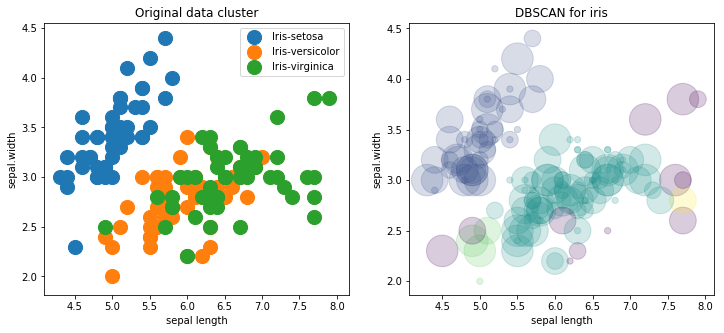

In [64]:
original=pd.read_csv('iris.data')
original.head(10)


plt.figure(figsize=(12, 5))

plt.subplot(1,2,1)
iris_types = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
for iris_type in iris_types:
    plt.scatter(
        original['5.1'][original['Iris-setosa'] == iris_type],
        original['3.5'][original['Iris-setosa'] == iris_type],
        label=iris_type,s=200,cmap='viridis'
    )
plt.legend()
plt.title('Original data cluster')
plt.xlabel('sepal length')
plt.ylabel('sepal.width')




plt.subplot(1,2,2)
plt.scatter(m[:,0], m[:,1], alpha=0.2,
            s=200*m[3], c=labels, cmap='viridis')
plt.title('DBSCAN for iris')
plt.xlabel('sepal length')
plt.ylabel('sepal.width')

## Silhouette Score 

In [65]:

silhouette_score(m,labels)

0.3193530542865189